# Project 2 
## Truman Fogler BF550

### Scope and Goals

The goal of the project is to practice data analysis in Python. To that end, each student should choose a
paper and reproduce at least two of its figures. It is important to make sure that you have access to the
data. The data could have been deposited in a public repository or available from the authors upon request.
Unless you have interest in processing raw data, it is often better to start with processed data. This is not
mandatory, only recommended. Processing data could be the main aspect of the project especially if it is
done using your own code.

As a rough guide, reproducing one figure that involves p-values and one figure that involves PCA or clustering is about the right amount of work when starting with processed data. Of course the nature of the
plots could be very different. Keep in mind however, that the idea is to use data analytics methods (ML
methods, regressions etc.), not simply plot the data, like you did in HW2. You need to find a paper where
the authors use data analytics methods, and reproduce couple of the figures in it.


# Selected Paper
## Orthogonality in Principal Component Analysis Allows the Discovery of Lipids in the Jejunum That Are Independent of Ad Libitum Feeding
https://www.mdpi.com/2218-1989/12/9/866


## Figure 1
Based on Figure S1 in the article. Scatterplot of scores of PCAs in Figure 2. 
#### Original
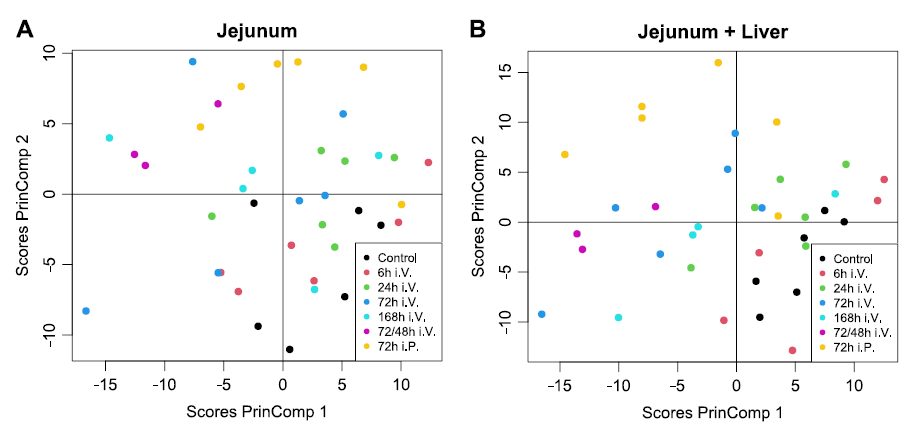

#### Reproduced



Scatterplot of the scores of the principal component analyses in Figure 2. 
Left: Scores of the first two principal components of the lipids identified in the jejunum (the loadings are in Figure 2, Left) Principal Component 1 represents 30% of the variance and Principal Component 2 represents 20% of the variation. Right: Scores of the first two principal component analysis of the lipids indentified in the jejunum and the liver (the loadings are in Figure 2, Right). Principal Component 1 represents 19% of the variance and Principal Component 2 represents 15% of the variation. i.V., intra venous treatment; i.P., intra peritoneal treatment.

## Figure 2
Figure 2 in the article. Scatterplot of PCA of variables in the lipidome.
#### Original

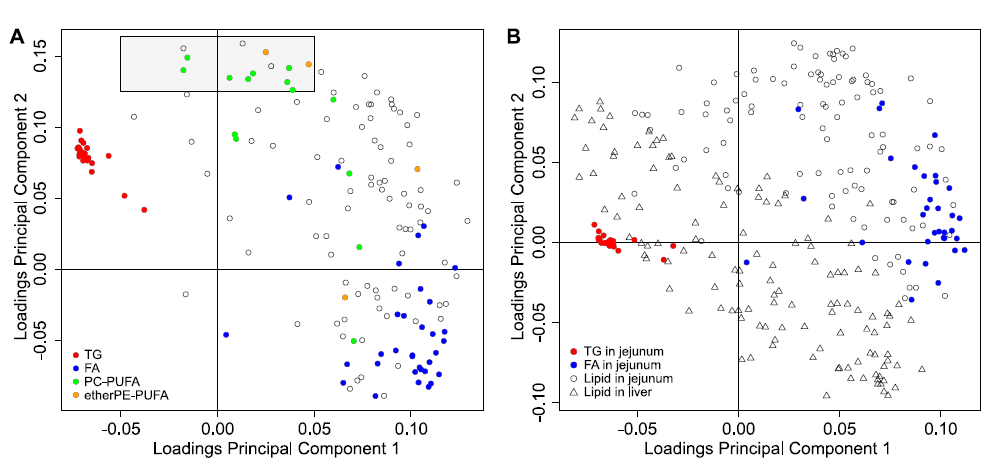

#### Reproduced



Figure 2. Loadings of the PCA of the jejunal and hepatic lipidomes. 
Left: Loadings plot of 1st and 2nd PCs of lipidome in jejunum. Triacylglycerols TGs in red; free fatty acids FAs in blue; phosphatidylcholines PCs in lime green; and ether phospholipids of ethanolamine in gold.
Right: Loadings of the 1st and 2nd PCs of joint lipidome in jejunum (circles) and liver (triangles). Jenunal TGs in red, jej FAs in blue, everything else in light gray. Scores are in Figure 1.

## Figure 3

Figure 3 in the article. Categorical plot of PCA Scores of the lipidome in the jejunum. 

#### Original

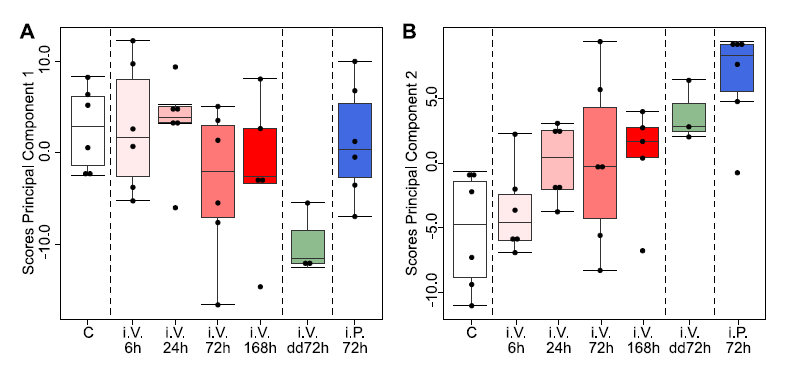

#### Reproduced




Figure 3. Scores of the PCA of lipidome in the jejunum.
Left facet: Boxplots of scores of 1st PC in jejunal lipidome. Manipulation is according to treatment of animals. 
Right facet: Boxplots of scores of 2nd PC in jejunal lipidome; manipulation is according to treatment of animals. dd, double dose; i.V. intravenous treatment; i.P. intra-peritoneal treatment.

Results shows that PC2 better explains variation from treatment.

# Data Processing and Plots

In [103]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticks
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(context = "paper", style = "ticks")

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## code goes here
def load_data(filepath):
    "Loads in data from filepath as Dataframe"
    return pd.read_csv(filepath, index_col = 0)

# load signals as df
signals = load_data("Signal.csv")
print(signals.head())
# load in variables df
variables = load_data("Supplementary Material_1.csv")
variables = variables.loc[variables.index.dropna()] # now removing NA-indexed rows
# validate
variables

               Var_001      Var_002      Var_003      Var_004      Var_005  \
Sample.ID                                                                    
Control    3743702.719  124938.2934  34342.77148  3237221.918  2276153.524   
Control    4545331.531  162651.0564  40449.35386  3890073.086  2257931.672   
Control    3142453.278  103221.2317  29182.41142  2627075.939  1540910.817   
Control    3773137.835  104932.8221  34026.15821  2841866.205  1662993.438   
Control    3685081.420  174503.3075  29162.54888  2856276.477  2873556.316   

               Var_006      Var_007       Var_008      Var_009      Var_010  \
Sample.ID                                                                     
Control    1839203.560  34907.60723   89996.94420  16844.08597  226153.1961   
Control    3007269.456  33246.50355  127398.01300  13204.65459  271822.4523   
Control    2041865.953  25659.92653   98065.68270  11812.44116  235509.9610   
Control    2293310.164  31054.23498  101527.72310  11785.1

,Tissue,family,lipid,Carbons,Unsaturations,RT/s,Adduct,mz,ppm m/z adduct,MS/MS: m/z and fragment identification,Unnamed: 11,Unnamed: 12
Sample.ID,,,,,,,,,,,,
Var_001,Liver,FA,FA(16:0),16.0,0.0,248.0,[M-H]-,255.2311,-5.3,NaN,NaN,NaN
Var_002,Liver,FA,FA(16:1),16.0,1.0,189.2,[M-H]-,253.2150,-7.0,NaN,NaN,NaN
Var_003,Liver,FA,FA(17:0),17.0,0.0,291.6,[M-H]-,269.2463,-6.6,NaN,NaN,NaN
Var_004,Liver,FA,FA(18:0),18.0,0.0,337.6,[M-H]-,283.2626,-3.7,NaN,NaN,NaN
Var_005,Liver,FA,FA(18:1),18.0,1.0,264.0,[M-H]-,281.2468,-4.3,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
Var_278,Jejunum,SM,SM(d40:2),40.0,2.0,670.0,[M+H]+,785.6508,-3.7,NaN,NaN,NaN
Var_279,Jejunum,SM,SM(d41:1),41.0,1.0,731.8,[M+H]+,801.6826,-3.0,NaN,NaN,NaN
Var_280,Jejunum,SM,SM(d42:1),42.0,1.0,751.9,[M+H]+,815.6988,-2.2,NaN,NaN,NaN


In [104]:
# Make jejunum-only values

print(variables.dtypes)

tissue_mask = variables.loc[:, "Tissue"] == "Jejunum" # keep values w Tissue=="Jejunum"
print(tissue_mask.tail())

"Making a copy of signals where the only non-zero variables are Jejunum"
jejunum_signals_df = signals.T.where(tissue_mask, other = 0.0, axis = 0)

jejunum_signals_df.T.head()

Tissue                                     object
family                                     object
lipid                                      object
Carbons                                   float64
Unsaturations                             float64
RT/s                                      float64
Adduct                                     object
mz                                        float64
ppm m/z adduct                            float64
MS/MS: m/z and fragment identification     object
Unnamed: 11                               float64
Unnamed: 12                               float64
dtype: object
Sample.ID
Var_278    True
Var_279    True
Var_280    True
Var_281    True
Var_282    True
Name: Tissue, dtype: bool


,Var_001,Var_002,Var_003,Var_004,Var_005,Var_006,Var_007,Var_008,Var_009,Var_010,...,Var_273,Var_274,Var_275,Var_276,Var_277,Var_278,Var_279,Var_280,Var_281,Var_282
Sample.ID,,,,,,,,,,,,,,,,,,,,,
Control,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,39349.09464,6411240.422,8243266.131,3076412.342,2455682.233,468789.3121,949536.2033,3570645.673,4383111.645,2158538.825
Control,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,29369.19504,6363726.217,5798585.701,2158111.661,1785544.841,352497.8170,690960.0751,2488716.981,3200070.187,1619211.355
Control,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,33187.68543,5945555.542,5600472.579,2195959.362,1721910.928,306371.7150,717631.6318,2254738.609,2695616.744,1367342.733
Control,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,69340.06999,6789465.677,7698740.799,3039580.526,2313397.924,455964.3334,997880.8836,3242282.592,4038371.548,2141077.111
Control,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,48330.13841,6126494.691,7161421.093,2801062.139,2673249.837,466810.0367,991277.1944,3351846.491,4238467.081,1897258.803


In [105]:
# Principal Component Analysis

# init std scaler
# standardize features by recentering at zero and scaling to unit variance
signals_standardized = StandardScaler().fit_transform(signals)

# Now apply PCA to selected features
num_components = 2
signals_PCA = PCA(n_components = num_components)
#
signals_PCA_fit = signals_PCA.fit_transform(signals_standardized)
print(f"{signals_PCA.components_.shape = }")

sample_id = signals.index

signals_PCA_scores = pd.DataFrame(signals_PCA_fit[:, :2], columns = ['PC_001', 'PC_002'], index = sample_id)
print(f"signals_PCA_scores.head \n{signals_PCA_scores.head()}")


# Do over all steps but for the jejunum signals only

# standardize features
j_signals_standardized = StandardScaler().fit_transform(jejunum_signals_df.T)
# 
jejunum_PCA = PCA(n_components = num_components)
jejunum_PCA_fit = jejunum_PCA.fit_transform(j_signals_standardized)
jejunum_PCA_fit[..., 0] = - jejunum_PCA_fit[..., 0] # reverse eigenvector direction for plots later
jejunum_PCA_scores = pd.DataFrame(jejunum_PCA_fit, columns = ['PC_001', 'PC_002'], index = sample_id)
print(f"jejunum_PCA_scores.head \n{jejunum_PCA_scores.head()}")

signals_PCA.components_.shape = (2, 282)
signals_PCA_scores.head 
             PC_001    PC_002
Sample.ID                    
Control    9.413856 -1.022951
Control   -0.028738 -9.427465
Control    3.870471 -6.907008
Control    6.982983 -1.638149
Control   -0.087840 -6.539702
jejunum_PCA_scores.head 
             PC_001    PC_002
Sample.ID                    
Control    8.068391 -3.348617
Control   -3.282909 -8.059449
Control   -0.336738 -9.910995
Control    5.803622 -7.912033
Control   -4.138326 -0.571479


Explained Variance: Jejunum PC1 0.30; Jejunum PC2 0.20; Joint Liver + Jejunum PC1 0.19; Joint Liver + Jejunum PC2 0.15


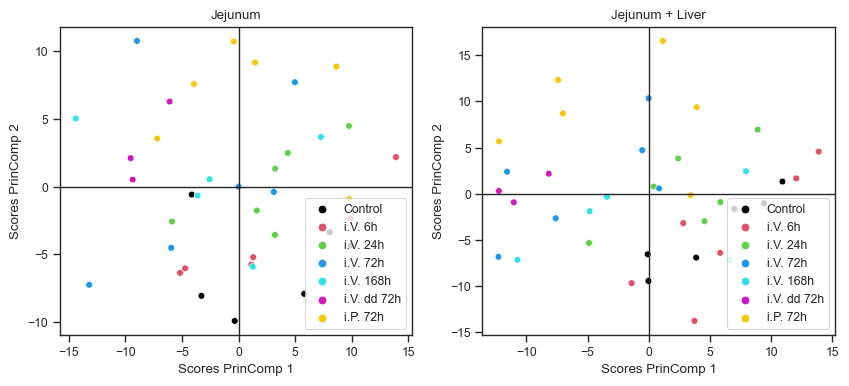

In [125]:
# Plotting PCA Scores
pc_one = signals_PCA_scores.loc[:, "PC_001"]
pc_two = signals_PCA_scores.loc[:, "PC_002"]
sample_id = signals.index.array
# print(sample_id)

# init figure
fig, axs = plt.subplots(1, 2, figsize = (10, 4))

with sns.axes_style("ticks", rc = {'axis.grid': False}): # temporarily set style
    with sns.color_palette(["#000000", "#DE5168", "#61CF4C", "#2197E7", "#31E2E4", "#CE1ABD", "#F5C70F"], n_colors=7):
        sns.scatterplot(data = jejunum_PCA_scores, x = "PC_001", y = "PC_002", hue = sample_id, ax = axs[0]) # Left
        sns.scatterplot(data = signals_PCA_scores, x = "PC_001", y = "PC_002", hue = sample_id, ax = axs[1]) # Right
sns.move_legend(axs[0], "lower right")
axs[0].set_title("Jejunum")
axs[0].set_xlabel("Scores PrinComp 1")
axs[0].set_ylabel("Scores PrinComp 2")
axs[0].axhline(0, c = "#262626", linewidth = 1)
axs[0].axvline(0, c = "#262626", linewidth = 1)
sns.move_legend(axs[1], "lower right")
axs[1].set_title("Jejunum + Liver")
axs[1].set_xlabel("Scores PrinComp 1")
axs[1].set_ylabel("Scores PrinComp 2")
axs[1].axhline(0, c = "#262626", linewidth = 1)
axs[1].axvline(0, c = "#262626", linewidth = 1)

j_v_explained = jejunum_PCA.explained_variance_ratio_
s_v_explained = signals_PCA.explained_variance_ratio_
var_explnd = f"Explained Variance: Jejunum PC1 {j_v_explained[0]:.2f}; Jejunum PC2 {j_v_explained[1]:.2f}; \
Joint Liver + Jejunum PC1 {s_v_explained[0]:.2f}; Joint Liver + Jejunum PC2 {s_v_explained[1]:.2f}"
print(var_explnd)

In [107]:
# More pca loadings stuff

loadings = signals_PCA.components_.T # Transpose to have loadings be in rows
# create df from loadings
loadings_df = pd.DataFrame(data=loadings, columns=['PC1_loadings', 'PC2_loadings'], index = signals.columns)
loadings_df.head()

# combining pca loadings with variables df
loadings_variables_merged = pd.concat((loadings_df, variables), axis = 1)
print(loadings_variables_merged.dtypes)

# mask out Lipid families not belonging to FAs or TGs
lipid_mask = loadings_variables_merged.family.isin(("TG", "FA"))
tissue_mask = loadings_variables_merged.Tissue.eq("Jejunum") # keep values w Tissue=="Jejunum"

loadings_variables_merged["family"] =  np.where(lipid_mask, loadings_variables_merged["family"], "Lipid")
loadings_variables_merged["family"] =  np.where(tissue_mask,
                                                loadings_variables_merged["family"] + " in jejunum",
                                                "Lipid" + " in liver")

print((loadings_variables_merged["family"]).unique())
loadings_variables_merged

PC1_loadings                              float64
PC2_loadings                              float64
Tissue                                     object
family                                     object
lipid                                      object
Carbons                                   float64
Unsaturations                             float64
RT/s                                      float64
Adduct                                     object
mz                                        float64
ppm m/z adduct                            float64
MS/MS: m/z and fragment identification     object
Unnamed: 11                               float64
Unnamed: 12                               float64
dtype: object
['Lipid in liver' 'FA in jejunum' 'Lipid in jejunum' 'TG in jejunum']


,PC1_loadings,PC2_loadings,Tissue,family,lipid,Carbons,Unsaturations,RT/s,Adduct,mz,ppm m/z adduct,MS/MS: m/z and fragment identification,Unnamed: 11,Unnamed: 12
Var_001,-0.005098,-0.052275,Liver,Lipid in liver,FA(16:0),16.0,0.0,248.0,[M-H]-,255.2311,-5.3,NaN,NaN,NaN
Var_002,0.043666,-0.071817,Liver,Lipid in liver,FA(16:1),16.0,1.0,189.2,[M-H]-,253.2150,-7.0,NaN,NaN,NaN
Var_003,-0.009278,-0.073087,Liver,Lipid in liver,FA(17:0),17.0,0.0,291.6,[M-H]-,269.2463,-6.6,NaN,NaN,NaN
Var_004,-0.045011,-0.001792,Liver,Lipid in liver,FA(18:0),18.0,0.0,337.6,[M-H]-,283.2626,-3.7,NaN,NaN,NaN
Var_005,0.039243,-0.071956,Liver,Lipid in liver,FA(18:1),18.0,1.0,264.0,[M-H]-,281.2468,-4.3,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Var_278,0.046389,0.108161,Jejunum,Lipid in jejunum,SM(d40:2),40.0,2.0,670.0,[M+H]+,785.6508,-3.7,NaN,NaN,NaN
Var_279,0.044894,0.103075,Jejunum,Lipid in jejunum,SM(d41:1),41.0,1.0,731.8,[M+H]+,801.6826,-3.0,NaN,NaN,NaN
Var_280,0.040907,0.120961,Jejunum,Lipid in jejunum,SM(d42:1),42.0,1.0,751.9,[M+H]+,815.6988,-2.2,NaN,NaN,NaN
Var_281,0.050726,0.118803,Jejunum,Lipid in jejunum,SM(d42:2),42.0,2.0,704.3,[M+H]+,813.6840,-1.2,NaN,NaN,NaN


In [116]:
# Repeat loadings df steps for jejunum

# Transpose
jejunum_loadings = jejunum_PCA.components_.T

# create df from loadings
jejunum_loadings_df = pd.DataFrame(data=jejunum_loadings, columns=['PC1_loadings', 'PC2_loadings'], index = signals.columns, copy = True)
jejunum_loadings_df["PC1_loadings"] = - jejunum_loadings_df.PC1_loadings

#  keep values w Tissue=="Jejunum"
tissue_mask = variables.Tissue == "Jejunum"
jejunum_variables = variables.where(tissue_mask, axis = 0)

# Generate merged jejunum loadings & variables
jejunum_loadings_variables_merged = pd.concat((jejunum_loadings_df, jejunum_variables), axis = 1)
jejunum_loadings_variables_merged = jejunum_loadings_variables_merged[tissue_mask] # subset unmasked rows

# ~mask~ rename values in 'family'
lipid_mask = jejunum_loadings_variables_merged.family.isin(["TG", "FA", "etherPE", "PC"])
jejunum_loadings_variables_merged.family = np.where(lipid_mask,
                                            jejunum_loadings_variables_merged.family, "Lipid") # masking column
print(jejunum_loadings_variables_merged.family.unique())

jejunum_loadings_variables_merged

['FA' 'Lipid' 'PC' 'etherPE' 'TG']


,PC1_loadings,PC2_loadings,Tissue,family,lipid,Carbons,Unsaturations,RT/s,Adduct,mz,ppm m/z adduct,MS/MS: m/z and fragment identification,Unnamed: 11,Unnamed: 12
Var_125,0.082502,-0.078743,Jejunum,FA,FA(16:1),16.0,1.0,198.9,[M-H]-,253.2151,-6.5,NaN,NaN,NaN
Var_126,0.067909,-0.081143,Jejunum,FA,FA(16:1),16.0,1.0,208.2,[M-H]-,253.2151,-6.5,NaN,NaN,NaN
Var_127,0.089006,-0.069148,Jejunum,FA,FA(17:0),17.0,0.0,293.7,[M-H]-,269.2465,-5.7,NaN,NaN,NaN
Var_128,0.119961,-0.053704,Jejunum,FA,FA(18:0),18.0,0.0,339.8,[M-H]-,283.2632,-1.9,NaN,NaN,NaN
Var_129,0.087701,-0.050282,Jejunum,FA,FA(18:1),18.0,1.0,259.2,[M-H]-,281.2473,-2.7,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Var_278,0.083989,0.116764,Jejunum,Lipid,SM(d40:2),40.0,2.0,670.0,[M+H]+,785.6508,-3.7,NaN,NaN,NaN
Var_279,0.083558,0.100558,Jejunum,Lipid,SM(d41:1),41.0,1.0,731.8,[M+H]+,801.6826,-3.0,NaN,NaN,NaN
Var_280,0.085964,0.125693,Jejunum,Lipid,SM(d42:1),42.0,1.0,751.9,[M+H]+,815.6988,-2.2,NaN,NaN,NaN
Var_281,0.093873,0.116447,Jejunum,Lipid,SM(d42:2),42.0,2.0,704.3,[M+H]+,813.6840,-1.2,NaN,NaN,NaN


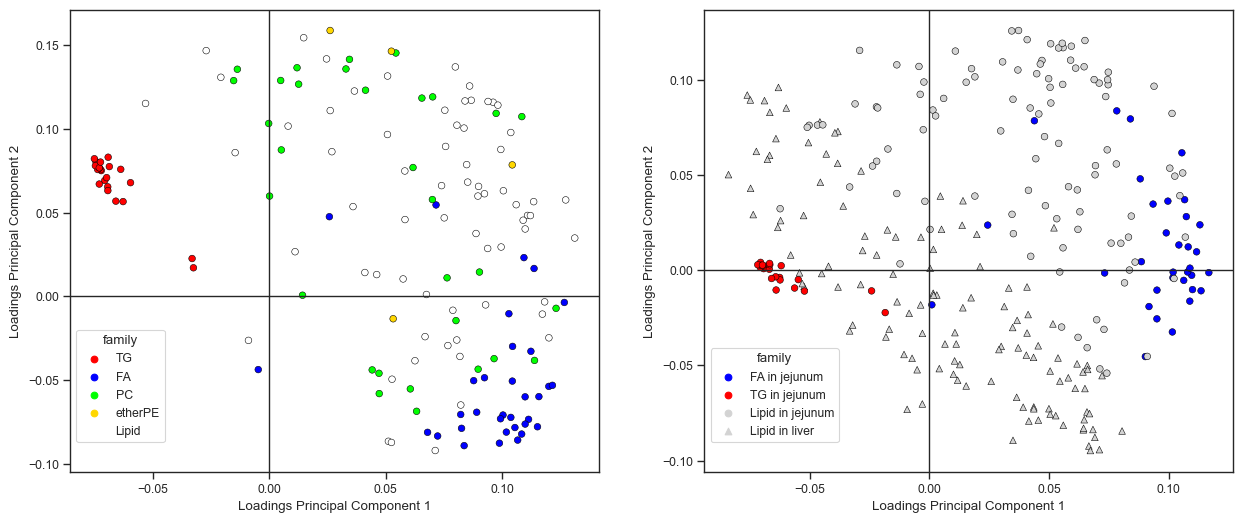

In [117]:
from matplotlib.text import Text

# Plot Loadings of Principal Components
labels = ["FA in jejunum", "TG in jejunum", "Lipid in jejunum", "Lipid in liver"]
# init figure
fig2, loadings_axs = plt.subplots(1, 2, figsize = (15, 6))

with sns.axes_style("ticks"):
    with sns.color_palette(["blue", "red", "lightgray", "lightgray"]):
        # plot jejunum lipidome
        sns.scatterplot(jejunum_loadings_variables_merged, x = "PC1_loadings", y = "PC2_loadings",
                hue = "family", hue_order = ("TG", "FA", "PC", "etherPE", "Lipid"),
                legend = 'auto', edgecolor = "black", palette = ["red", "blue", "lime", "gold", "white"],
                ax = loadings_axs[0])
        # plot lipidome in jejunum + liver
        sns.scatterplot(loadings_variables_merged, x = "PC1_loadings", y = "PC2_loadings",
                hue = "family", hue_order = labels, edgecolor = ["black"],
                style = "family", markers = ["^", "o", "o", "o"], legend = 'auto',
                ax = loadings_axs[1])

sns.move_legend(loadings_axs[0], "lower left", bbox_to_anchor = (0.0, 0.05))
loadings_axs[0].axhline(0, color = "#262626", linewidth = 1)
loadings_axs[0].axvline(0, color = "#262626", linewidth = 1)
loadings_axs[0].set_xlabel("Loadings Principal Component 1")
loadings_axs[0].set_ylabel("Loadings Principal Component 2")
sns.move_legend(loadings_axs[1], "lower left", bbox_to_anchor = (0.0, 0.05))
loadings_axs[1].xaxis.set_major_locator(ticks.MultipleLocator(0.050))
loadings_axs[1].axhline(0, color = "#262626", linestyle = '-', linewidth = 1)
loadings_axs[1].axvline(0, color = "#262626", linestyle = '-', linewidth = 1)
loadings_axs[1].set_xlabel("Loadings Principal Component 1")
loadings_axs[1].set_ylabel("Loadings Principal Component 2")
# Text(x = -0.075, y = 0.15, text = 'B')
plt.show()

In [110]:
# Prepare long form of signals_PCA_scores for the categorical plot

jejunum_long_PCA = jejunum_PCA_scores.melt(var_name = "PC",
                                            value_name = "Scores Principal Component",
                                            ignore_index = False)
sample_id = jejunum_long_PCA.index.to_frame() # creates new dataframe column with index's values
jejunum_long_PCA = jejunum_long_PCA.assign(Sample_Id = sample_id)

jejunum_long_PCA.head()

,PC,Scores Principal Component,Sample_Id
Sample.ID,,,
Control,PC_001,8.068391,Control
Control,PC_001,-3.282909,Control
Control,PC_001,-0.336738,Control
Control,PC_001,5.803622,Control
Control,PC_001,-4.138326,Control


c:\Users\truma\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


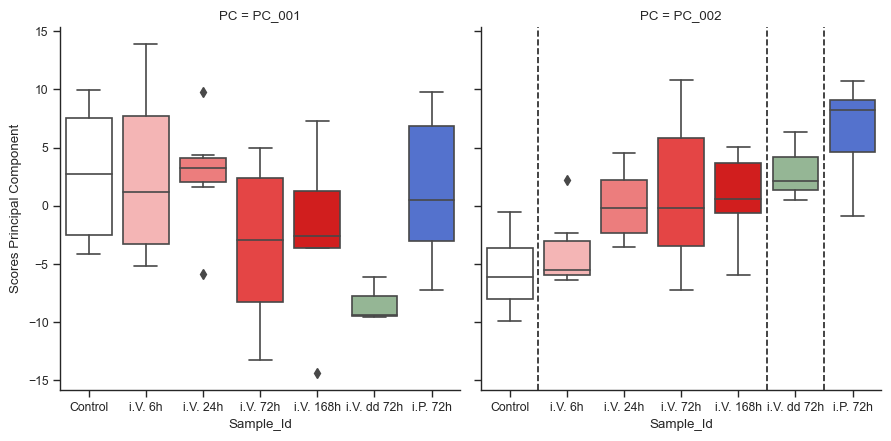

In [127]:
# Plot box of Jejunum Scores

with sns.color_palette(palette = ["#FFF", "#FFAAAA", "#FF6A6A", "#FF2A2A", "#EF0000", "#8FBC8F", "#4068E1"], n_colors=7):
    box = sns.catplot(data = jejunum_long_PCA, kind = "box", col = "PC", x = "Sample_Id", y = "Scores Principal Component",
                     aspect = 1, height = 4.5)
    plt.ylabel("Scores Principal Component")
    plt.axvline(0.5, c = "#222", linestyle = "--")
    plt.axvline(4.5, c = "#222", linestyle = "--")
    plt.axvline(5.5, c = "#222", linestyle = "--")